In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [2]:
# Definamos el sistema usando una lista
G = np.array([lambda x,y,z: 3*x - np.cos(y*z) - 1.5,
     lambda x,y,z: 4*x**2 - 625*y**2 + 2*y -1,
     lambda x,y,z: np.exp(-x*y) + 20*z + 9.471975])

print(G)

[<function <lambda> at 0x7fe29a3b1560>
 <function <lambda> at 0x7fe29a3b15f0>
 <function <lambda> at 0x7fe29a3b1680>]


In [3]:
def GetVectorG(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [4]:
GetVectorG(G,[0,0,0])

array([-2.5     , -1.      , 10.471975])

In [5]:
def GetF(G,r):
    
    v = GetVectorG(G,r)
    
    return 0.5*np.sum(v**2)

In [6]:
GetF(G,[0,0,0])

58.45613020031251

In [7]:
def GetJacobian(G,r,h=0.001):
    
    dim = len(G)
    
    J = np.zeros( (dim,dim) )
    
    
    for i in range(dim):
        
        J[i,0] = (G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)  
        J[i,1] = (G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)  
        J[i,2] = (G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
        
    return J.T

In [8]:
J = GetJacobian(G,[1,0,0])
print(J)

[[ 3.          8.          0.        ]
 [ 0.          2.         -1.00000017]
 [ 0.          0.         20.        ]]


In [14]:
def GetSolve(G,r,lr=0.0005, error=1e-4, itmax = int(1e4)):
    
    it = 0
    d = 1
    
    F = []
    
    while d > error and it < itmax:
        
        it += 1
        
        CurrentF = GetF(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorG(G,r)
        
        # aCTUALIZAMOS EN CONTRA DEL GRADIENTE
        r -= lr*np.dot(J,GVector)
        
        NewF = GetF(G,r)
        
        F.append(NewF)
        
        # Actualizamos la distancia
        
        d = np.abs(CurrentF-NewF)/NewF
        
    return r,it,F

In [15]:
# UN vector inicial
r = np.zeros(len(G))
xsol,it,F = GetSolve(G,r)

In [16]:
print(xsol,it)

[ 0.8127044   0.04736681 -0.52150526] 10000


In [17]:
np.round( GetVectorG(G,xsol),3 )

array([-0.062,  0.334,  0.004])

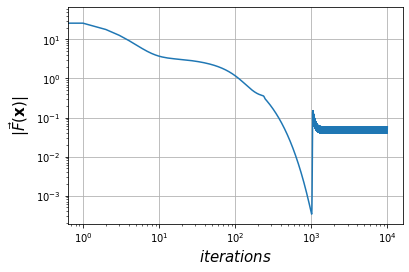

In [18]:
plt.plot(F)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$iterations$', fontsize=15)
plt.ylabel(r'$|\vec{F}(\mathbf{x})|$', fontsize=15)
plt.grid()